<a href="https://colab.research.google.com/github/elly760/AI-projects/blob/main/covid_dataset-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# readind and accessing the covide data
confirmed = "/content/drive/MyDrive/dl-huawei-21/confirmed.csv"
deaths= "/content/drive/MyDrive/dl-huawei-21/deaths.csv"
recovered='/content/drive/MyDrive/dl-huawei-21/recovered.csv'

In [2]:
import pandas as pd


In [3]:
df_confirmed=pd.read_csv(confirmed)
# viewing the first 5 rows of the cornfirmed cases
df_confirmed

,date,confirmed,Province/State,Country/Region
0,01/22/2020,0,,Afghanistan
1,01/22/2020,0,,Albania
2,01/22/2020,0,,Algeria
3,01/22/2020,0,,Andorra
4,01/22/2020,0,,Angola
...,...,...,...,...
139375,06/09/2021,9635,,Vietnam
139376,06/09/2021,310544,,West Bank and Gaza
139377,06/09/2021,6832,,Yemen
139378,06/09/2021,103763,,Zambia


In [4]:
# ACCSSING THE KEYS OF THE DATA FRAM
keys=df_confirmed.keys()
print(f"The keys in the confirmed cases are", keys)
# Displaying the column names of the dataset
column_names=df_confirmed.columns
print(f"The column names are", column_names)

The keys in the confirmed cases are Index(['date', 'confirmed', 'Province/State', 'Country/Region'], dtype='object')
The column names are Index(['date', 'confirmed', 'Province/State', 'Country/Region'], dtype='object')


In [5]:
# COMBINING THE THREE TABLES
# create the dataframes for all the csv files
deaths_df=pd.read_csv(deaths)
recovered_df=pd.read_csv(recovered)
# LETS CONBINE THE FILES NOW
combined_1=pd.merge(df_confirmed,recovered_df, on=["Province/State","Country/Region","date"])
combined_1
combined_data=pd.merge(combined_1,deaths_df, on=["Province/State","Country/Region","date"])
combined_data

,date,confirmed,Province/State,Country/Region,recovered,deaths
0,01/22/2020,0,,Afghanistan,0,0
1,01/22/2020,0,,Albania,0,0
2,01/22/2020,0,,Algeria,0,0
3,01/22/2020,0,,Andorra,0,0
4,01/22/2020,0,,Angola,0,0
...,...,...,...,...,...,...
121935,06/09/2021,9635,,Vietnam,3636,55
121936,06/09/2021,310544,,West Bank and Gaza,302357,3520
121937,06/09/2021,6832,,Yemen,3675,1337
121938,06/09/2021,103763,,Zambia,94189,1324


In [ ]:

# column_to_drop = 'recovered_x'  # Provide the correct column name here
# combined_data.drop(column_to_drop, axis=1, inplace=True)
# combined_data

In [ ]:
# # RNAME THE RECOVERED_X COLUMN
# old_column_name='recovered_y'
# new_column_name='recovered'

# # RENAMING
# combined_data.rename(columns={old_column_name:new_column_name}, inplace=True)

In [6]:
combined_data

,date,confirmed,Province/State,Country/Region,recovered,deaths
0,01/22/2020,0,,Afghanistan,0,0
1,01/22/2020,0,,Albania,0,0
2,01/22/2020,0,,Algeria,0,0
3,01/22/2020,0,,Andorra,0,0
4,01/22/2020,0,,Angola,0,0
...,...,...,...,...,...,...
121935,06/09/2021,9635,,Vietnam,3636,55
121936,06/09/2021,310544,,West Bank and Gaza,302357,3520
121937,06/09/2021,6832,,Yemen,3675,1337
121938,06/09/2021,103763,,Zambia,94189,1324


In [7]:
# lets show the null values
combined_data.isna().sum()

date              0
confirmed         0
Province/State    0
Country/Region    0
recovered         0
deaths            0
dtype: int64

In [9]:
import warnings
warnings.filterwarnings("ignore")
#  DISPLAYING THE RECORDS GENERATED WITH IN A SPECIFIC PERIOD PF TIME
# converting to date time
# Convert 'Date' column to datetime format (if not already)
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Define the specific period of time
start_date = '22/01/2021'
end_date = '29/08/2021'

# Filter DataFrame for the specific period of time
period_df = combined_data[(combined_data['date'] >= start_date) & (combined_data['date'] <= end_date)]
period_df

,date,confirmed,Province/State,Country/Region,recovered,deaths
85800,2021-01-22,54483,,Afghanistan,46912,2370
85801,2021-01-22,70655,,Albania,42895,1303
85802,2021-01-22,105124,,Algeria,71552,2856
85803,2021-01-22,9416,,Andorra,8537,93
85804,2021-01-22,19269,,Angola,17223,452
...,...,...,...,...,...,...
121935,2021-06-09,9635,,Vietnam,3636,55
121936,2021-06-09,310544,,West Bank and Gaza,302357,3520
121937,2021-06-09,6832,,Yemen,3675,1337
121938,2021-06-09,103763,,Zambia,94189,1324


In [12]:
# NORMALIZING THE DATA
from sklearn.preprocessing import StandardScaler
# INITIALIZE
scaler=StandardScaler()
combined_data[["confirmed","recovered","deaths"]]=scaler.fit_transform(combined_data[["confirmed","recovered","deaths"]])

In [13]:
# SPLITING THE DATA ITNO X TRAIN AND Y TRAIN
from sklearn.model_selection import train_test_split


# Splitting the data into features (X) and target variable (y)
X = combined_data[['confirmed', 'recovered']]  # Features (confirmed cases and recovered cases)
y = combined_data['deaths']       # Target variable (deaths)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (97552, 2)
Shape of y_train: (97552,)
Shape of X_test: (24388, 2)
Shape of y_test: (24388,)


In [14]:
combined_data

,date,confirmed,Province/State,Country/Region,recovered,deaths
0,2020-01-22,-0.149143,,Afghanistan,-0.159044,-0.179253
1,2020-01-22,-0.149143,,Albania,-0.159044,-0.179253
2,2020-01-22,-0.149143,,Algeria,-0.159044,-0.179253
3,2020-01-22,-0.149143,,Andorra,-0.159044,-0.179253
4,2020-01-22,-0.149143,,Angola,-0.159044,-0.179253
...,...,...,...,...,...,...
121935,2021-06-09,-0.142431,,Vietnam,-0.154425,-0.177356
121936,2021-06-09,0.067182,,West Bank and Gaza,0.225124,-0.057788
121937,2021-06-09,-0.144384,,Yemen,-0.154375,-0.133117
121938,2021-06-09,-0.076862,,Zambia,-0.039370,-0.133566


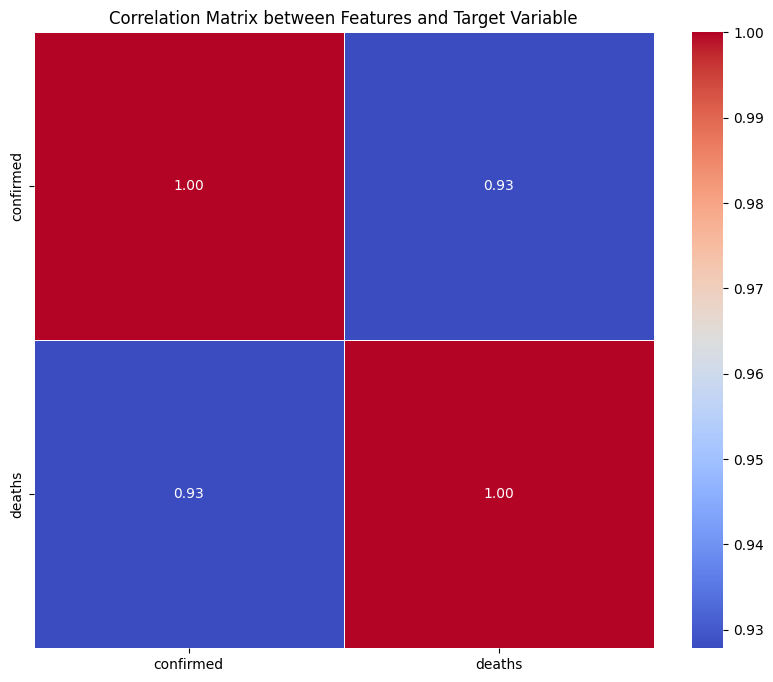

In [15]:
# CORRELATION MATRIX
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training features and target variable
# Concatenate X_train and y_train into a single DataFrame
data = pd.concat([pd.DataFrame(X_train, columns=['confirmed']), pd.Series(y_train, name='deaths')], axis=1)

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Features and Target Variable')
plt.show()


In [16]:
# BUILDING THE MODEL FOR TRAINING
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import StandardScaler
#
# Assuming X_train and y_train are your training features and target variable
# Ensure that X_train and y_train are numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Reshape the features for GRU input
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])

model = Sequential([
    GRU(units=50, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True, activation='relu'),
    GRU(units=50, activation='relu'),
    Dense(1)  # Output layer with one neuron for predicting deaths
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)


Epoch 1/10
3049/3049 [==============================] - 22s 6ms/step - loss: 0.1437
Epoch 2/10
3049/3049 [==============================] - 13s 4ms/step - loss: 0.1077
Epoch 3/10
3049/3049 [==============================] - 13s 4ms/step - loss: 0.1032
Epoch 4/10
3049/3049 [==============================] - 13s 4ms/step - loss: 0.0990
Epoch 5/10
3049/3049 [==============================] - 12s 4ms/step - loss: 0.0956
Epoch 6/10
3049/3049 [==============================] - 12s 4ms/step - loss: 0.0918
Epoch 7/10
3049/3049 [==============================] - 12s 4ms/step - loss: 0.0898
Epoch 8/10
3049/3049 [==============================] - 12s 4ms/step - loss: 0.0882
Epoch 9/10
3049/3049 [==============================] - 13s 4ms/step - loss: 0.0850
Epoch 10/10
3049/3049 [==============================] - 11s 4ms/step - loss: 0.0827


In [17]:
# USING AND SAVING THE TRAINIG MODEL
# Save the trained model
model.save("gru_model")

# Save the scaler (to scale data during inference)
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [18]:
from tensorflow.keras.models import load_model
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the trained model
model = load_model("gru_model")

# Load the scaler
scaler = joblib.load("scaler.pkl")

# Assuming X_test and y_test are your test features and target variable
# Ensure that X_test and y_test are numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Standardize the test features using the scaler
X_test_scaled = scaler.transform(X_test)

# Reshape the features for GRU input
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Mean Squared Error on Test Set:", mse_test)
print("Mean Absolute Error on Test Set:", mae_test)


763/763 [==============================] - 2s 2ms/step
Mean Squared Error on Test Set: 0.1165989040505879
Mean Absolute Error on Test Set: 0.09152019849369397
